In [5]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.ops import nearest_points
from IPython.display import display
pd.options.display.max_columns = None

In [6]:
streets_file = 'chi_roads/Street Center Lines/geo_export_3707e052-5aa1-4bf6-8676-474b93a57dde.shp'
major_streets_file = 'chi_roads/Major_20Streets/Major_Streets.shp'
streets = gpd.read_file(streets_file)
major_streets = gpd.read_file(major_streets_file)

In [7]:
major_streets = major_streets.to_crs(epsg=4326)

In [8]:
traffic_counts_file = 'chi_roads/Average_Daily_Traffic_Counts.csv'
collisions_file = 'chi_collisions/Traffic_Crashes_-_Crashes.csv'
traffic_counts = pd.read_csv(traffic_counts_file)
collisions = pd.read_csv(collisions_file)

In [9]:
traffic_counts_geometry = [Point(xy) for xy in zip(traffic_counts.Longitude, traffic_counts.Latitude)]
traffic_counts = gpd.GeoDataFrame(traffic_counts, geometry=traffic_counts_geometry)

In [10]:
collisions_geometry = [Point(xy) for xy in zip(collisions.LONGITUDE, collisions.LATITUDE)]
collisions = gpd.GeoDataFrame(collisions, geometry=collisions_geometry)

In [11]:
minx, miny, maxx, maxy = major_streets.total_bounds

(41.64458402788999, 41.823031137115876)

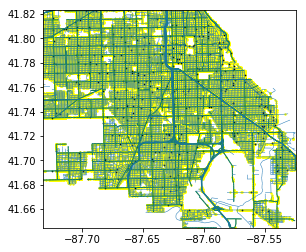

In [12]:
base = major_streets.plot(linewidth=1, color='green')
streets.plot(ax=base, linewidth=0.5)
collisions.plot(ax=base, marker='o', color='yellow', markersize=2)
ax = traffic_counts.plot(ax=base, marker='o', color='black', markersize=0.5)
ax.set_xlim(minx+.2, maxx)
ax.set_ylim(miny, maxy-.2)

In [13]:
streets.head()

,class,date_creat,time_creat,create_use,dir_travel,edit_date,edit_type,ewns,ewns_coord,ewns_dir,f_cross,f_cross_st,f_zlev,flag_strin,fnode_id,l_censusbl,l_f_add,l_fips,l_parity,l_t_add,l_zip,length,logiclf,logiclt,logicrf,logicrt,objectid,oneway_dir,pre_dir,r_censusbl,r_f_add,r_fips,r_parity,r_t_add,r_zip,shape_len,status,date_statu,time_statu,street_nam,street_typ,streetname,suf_dir,t_cross,t_cross_st,t_zlev,tiered,tnode_id,trans_id,date_updat,time_updat,update_use,geometry
0,4,1999-01-01,00:00:00.000,EXISTING,F,0.0,None,-232.0,232.0,W,245|W|ENGLEWOOD|AVE|,2208.0,0.0,None,10809.0,170316802002035,0.0,14000.0,O,0.0,60621,220.566014,0.0,0.0,6228.0,6248.0,510.0,S,S,170316802002035,6228.0,14000.0,E,6248.0,60621,220.566012,N,1999-01-01,00:00:00.000,YALE,AVE,1782.0,None,6250|S|||,0.0,0.0,N,16581.0,127104.0,1999-01-01,00:00:00.000,EXISTING,LINESTRING (-87.63187018233509 41.780809747581...
1,2,1999-01-01,00:00:00.000,EXISTING,B,0.0,None,0.0,0.0,None,800|E|73RD|ST|,170.0,0.0,None,6501.0,170316908003004,7301.0,14000.0,O,7359.0,60619,664.774635,7301.0,7399.0,7300.0,7398.0,511.0,None,S,170316909002000,7300.0,14000.0,E,7358.0,60619,664.774607,N,1999-01-01,00:00:00.000,COTTAGE GROVE,AVE,1236.0,None,800|E|74TH|ST|,172.0,0.0,N,34082.0,128895.0,1999-01-01,00:00:00.000,EXISTING,LINESTRING (-87.60548932047928 41.762229643527...
2,4,1999-01-01,00:00:00.000,EXISTING,B,0.0,None,-2500.0,2500.0,W,2500|W|108TH|ST|,1803.0,0.0,None,15338.0,170317503001011,10801.0,14000.0,O,10859.0,60655,665.378484,10801.0,10899.0,10800.0,10898.0,512.0,None,S,170317503001010,10800.0,14000.0,E,10858.0,60655,665.378453,N,1999-01-01,00:00:00.000,CAMPBELL,AVE,1177.0,None,2500|W|109TH|ST|,1805.0,0.0,N,22358.0,142645.0,1999-01-01,00:00:00.000,EXISTING,LINESTRING (-87.6838184819274 41.6972438444297...
3,4,1999-01-01,00:00:00.000,EXISTING,B,0.0,None,-932.0,932.0,W,11024|S|||,0.0,0.0,None,15799.0,170317501001011,0.0,14000.0,O,0.0,60643,152.564889,0.0,0.0,11026.0,11032.0,513.0,None,S,170317501001010,11026.0,14000.0,E,11032.0,60643,152.564966,N,1999-01-01,00:00:00.000,SANGAMON,ST,1696.0,None,||DEAD END||,0.0,0.0,N,28881.0,148189.0,1999-01-01,00:00:00.000,EXISTING,LINESTRING (-87.64584189298007 41.693398400444...
4,4,1999-01-01,00:00:00.000,EXISTING,B,0.0,None,-11800.0,11800.0,S,11800|S|VINCENNES|AVE|,1752.0,0.0,None,36407.0,170317505003010,1933.0,14000.0,O,1959.0,60643,332.691371,1933.0,1999.0,1932.0,1998.0,514.0,None,W,170317505003011,1932.0,14000.0,E,1958.0,60643,332.691382,N,1999-01-01,00:00:00.000,118TH,ST,1823.0,None,11799|S|CHURCH|ST|,1214.0,0.0,N,36534.0,139728.0,1999-01-01,00:00:00.000,EXISTING,LINESTRING (-87.67053671319235 41.679759274890...


In [14]:
def clean_date(raw_date):
    raw_date = raw_date.split(' ')
    date = raw_date[0]
    time = raw_date[1]
    time_split = time.split(':')
    hour = time_split[0]
    minute = time_split[1]
    if raw_date[2] == 'PM' and hour != '12':
        int_hour = int(hour) + 12
        hour = str(int_hour)
    elif raw_date[2] == 'AM' and hour == '12':
        hour = '00'
        
    time_str = hour + minute
    time = int(time_str)
    year = int(date[6:])
    return date, time, year

In [15]:
collisions['DATE'] = collisions.CRASH_DATE.apply(lambda x: clean_date(x)[0])
collisions['TIME'] = collisions.CRASH_DATE.apply(lambda x: clean_date(x)[1])
collisions['YEAR'] = collisions.CRASH_DATE.apply(lambda x: clean_date(x)[2])
collisions = collisions.drop('CRASH_DATE', axis=1)

In [16]:
seventeen_filter = ((collisions['CRASH_MONTH'] > 8) & (collisions['YEAR'] == 2017))
collisions = collisions[seventeen_filter | (collisions['YEAR'] > 2017)]

In [17]:
streets.dropna(subset=['geometry'], inplace=True)

In [18]:
collisions

,RD_NO,CRASH_DATE_EST_I,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,geometry,DATE,TIME,YEAR
0,JC334993,NaN,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/04/2019 11:05:00 PM,FOLLOWING TOO CLOSELY,NOT APPLICABLE,300,N,LAKE SHORE DR SB,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,5,7,41.886140,-87.614274,POINT (-87.614274106164 41.8861404879),POINT (-87.61427410600001 41.886140488),07/04/2019,2233,2019
1,JC370822,NaN,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/30/2019 10:25:00 AM,FAILING TO YIELD RIGHT-OF-WAY,IMPROPER TURNING/NO SIGNAL,8201,S,DR MARTIN LUTHER KING JR DR,631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,7,41.745549,-87.614670,POINT (-87.614669906271 41.745549113377),POINT (-87.614669906 41.745549113),07/30/2019,1022,2019
2,JC387098,NaN,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",08/10/2019 05:35:00 PM,EQUIPMENT - VEHICLE CONDITION,NOT APPLICABLE,6747,S,CREGIER AVE,332.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,7,8,41.772004,-87.581234,POINT (-87.58123401629 41.772004323752),POINT (-87.58123401600001 41.772004324),08/10/2019,1700,2019
3,JC395195,NaN,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",08/16/2019 04:53:00 PM,UNABLE TO DETERMINE,NOT APPLICABLE,554,N,FRANKLIN ST,1831.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,6,8,41.892327,-87.635742,POINT (-87.635741843096 41.89232650689),POINT (-87.63574184299999 41.892326507),08/16/2019,1653,2019
4,JC396604,NaN,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",08/17/2019 06:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3700,N,WESTERN AVE,1921.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,7,8,41.948637,-87.688458,POINT (-87.688457506457 41.948636883802),POINT (-87.68845750600001 41.948636884),08/17/2019,1604,2019
5,JC411237,NaN,30,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,UNKNOWN,NaN,NO INJURY / DRIVE AWAY,Y,NaN,NaN,"OVER $1,500",08/28/2019 07:59:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3716,S,ARCHER AVE,911.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0.0,19,4,8,41.826040,-87.684967,POINT (-87.684967399868 41.826040017229),POINT (-87.68496740000001 41.826040017),08/28/2019,1920,2019
6,JC413474,NaN,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,ON SCENE,NO INJURY / DRIVE AWAY,Y,NaN,NaN,"OVER $1,500",08/30/2019 02:25:00 PM,FAILING TO REDUCE SPEED TO AVOID CRASH,UNABLE TO DETERMINE,5335,S,WESTERN AVE,923.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATION OF INJ

In [19]:
collisions_no_int = collisions[collisions.INTERSECTION_RELATED_I != 'Y']
collisions_no_int

,RD_NO,CRASH_DATE_EST_I,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,LANE_CNT,ALIGNMENT,ROADWAY_SURFACE_COND,ROAD_DEFECT,REPORT_TYPE,CRASH_TYPE,INTERSECTION_RELATED_I,NOT_RIGHT_OF_WAY_I,HIT_AND_RUN_I,DAMAGE,DATE_POLICE_NOTIFIED,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,STREET_NO,STREET_DIRECTION,STREET_NAME,BEAT_OF_OCCURRENCE,PHOTOS_TAKEN_I,STATEMENTS_TAKEN_I,DOORING_I,WORK_ZONE_I,WORK_ZONE_TYPE,WORKERS_PRESENT_I,NUM_UNITS,MOST_SEVERE_INJURY,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION,geometry,DATE,TIME,YEAR
0,JC334993,NaN,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/04/2019 11:05:00 PM,FOLLOWING TOO CLOSELY,NOT APPLICABLE,300,N,LAKE SHORE DR SB,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22,5,7,41.886140,-87.614274,POINT (-87.614274106164 41.8861404879),POINT (-87.61427410600001 41.886140488),07/04/2019,2233,2019
1,JC370822,NaN,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"OVER $1,500",07/30/2019 10:25:00 AM,FAILING TO YIELD RIGHT-OF-WAY,IMPROPER TURNING/NO SIGNAL,8201,S,DR MARTIN LUTHER KING JR DR,631.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3,7,41.745549,-87.614670,POINT (-87.614669906271 41.745549113377),POINT (-87.614669906 41.745549113),07/30/2019,1022,2019
2,JC387098,NaN,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",08/10/2019 05:35:00 PM,EQUIPMENT - VEHICLE CONDITION,NOT APPLICABLE,6747,S,CREGIER AVE,332.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,7,8,41.772004,-87.581234,POINT (-87.58123401629 41.772004323752),POINT (-87.58123401600001 41.772004324),08/10/2019,1700,2019
3,JC395195,NaN,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",08/16/2019 04:53:00 PM,UNABLE TO DETERMINE,NOT APPLICABLE,554,N,FRANKLIN ST,1831.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,6,8,41.892327,-87.635742,POINT (-87.635741843096 41.89232650689),POINT (-87.63574184299999 41.892326507),08/16/2019,1653,2019
4,JC396604,NaN,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,NaN,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NaN,NO INJURY / DRIVE AWAY,NaN,NaN,Y,"$501 - $1,500",08/17/2019 06:30:00 PM,UNABLE TO DETERMINE,UNABLE TO DETERMINE,3700,N,WESTERN AVE,1921.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,1.0,0.0,16,7,8,41.948637,-87.688458,POINT (-87.688457506457 41.948636883802),POINT (-87.68845750600001 41.948636884),08/17/2019,1604,2019
7,JC414382,NaN,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",FIXED OBJECT,NOT DIVIDED,NaN,"CURVE, LEVEL",DRY,NO DEFECTS,ON SCENE,INJURY AND / OR TOW DUE TO CRASH,NaN,NaN,NaN,"OVER $1,500",08/31/2019 04:35:00 AM,PHYSICAL CONDITION OF DRIVER,NOT APPLICABLE,1501,N,HUMBOLDT DR,1423.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NONINCAPACITATING INJURY,1.0,0.0,0.0,1.0,0.0,0.0,0.0,4,7,8,41.908428,-87.701257,POINT (-87.701257156814 41.908428203363),POINT (-87.701257157 41.908428203),08/31/2019,435,2019
8,JC413930,NaN,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,NaN,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NOT ON SCENE (DESK REPORT),NO INJURY / DRIVE AWAY,NaN,NaN,NaN,"$501 - $1,500",08/30/2019 07:57:00 PM,FOLLOWING TOO CLOSELY,FOLLOWING TOO CLOSELY,5900,N,SHERIDAN RD,2022.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NO INDICATI

In [20]:
joined = pd.read_csv('chi_collisions/joined2.csv', low_memory=False)

In [21]:
joined.trans_id = joined.trans_id.astype(int)

In [22]:
# joined.RD_NO.apply(str)

In [23]:
crashes = joined[joined.RD_NO.notnull()]

In [24]:
crashes['CRASH_DA_1'] = pd.to_datetime(crashes.CRASH_DA_1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [25]:
# cols = crashes.columns.tolist()
# for i in range(len(cols)):
#     print(i, cols[i])

In [26]:
crashes = crashes[crashes.CRASH_DA_1 >= '2017-7-1']

In [27]:
# crashes[['trans_id', 'RD_NO']].groupby('RD_NO').count()

In [28]:
# cols = joined.columns.tolist()
# for i in range(len(cols)):
#     print(i, cols[i])

In [29]:
crashes.drop(crashes.iloc[:, 55:], axis=1, inplace=True)

In [30]:
crashes.drop('RD_NO', axis=1, inplace=True)
crashes.drop('CRASH_DATE', axis=1, inplace=True)

In [31]:
crashes

,class,date_creat,time_creat,create_use,dir_travel,edit_date,edit_type,ewns,ewns_coord,ewns_dir,f_cross,f_cross_st,f_zlev,flag_strin,fnode_id,l_censusbl,l_f_add,l_fips,l_parity,l_t_add,l_zip,length,logiclf,logiclt,logicrf,logicrt,objectid,oneway_dir,pre_dir,r_censusbl,r_f_add,r_fips,r_parity,r_t_add,r_zip,shape_len,status,date_statu,time_statu,street_nam,street_typ,streetname,suf_dir,t_cross,t_cross_st,t_zlev,tiered,tnode_id,trans_id,date_updat,time_updat,update_use,CRASH_DA_1
0,1,1999-01-01,00:00:00.000,EXISTING,T,0.0,NaN,0.0,0.0,NaN,299|N|||,0.0,1.0,NaN,4132.0,1.703132e+14,300.0,14000.0,E,326.0,60601.0,439.082651,300.0,326.0,301.0,327.0,43559.0,S,N,1.703132e+14,301.0,14000.0,O,327.0,60601.0,439.082630,N,1999-01-01,00:00:00.000,LAKE SHORE,DR,688.0,SB,329|N|||,355.0,1.0,N,36725.0,118772,1999-01-01,00:00:00.000,EXISTING,2019-07-04 22:33:00
1,9,1999-01-01,00:00:00.000,EXISTING,T,20050406.0,Street name change,0.0,0.0,NaN,475|E|RANDOLPH|ST|,322.0,0.0,NaN,30372.0,1.703132e+14,160.0,14000.0,E,298.0,60601.0,634.428387,160.0,298.0,161.0,299.0,34511.0,S,N,1.703132e+14,161.0,14000.0,O,299.0,60601.0,634.428436,N,1999-01-01,00:00:00.000,LSD RANDOLPH ST,XR,774.0,NaN,300|N|LAKE SHORE|DR|,688.0,1.0,N,4132.0,145323,2005-04-06,00:00:00.000,EXISTING,2019-07-04 22:33:00
2,3,1999-01-01,00:00:00.000,EXISTING,B,0.0,NaN,400.0,400.0,E,400|E|82ND|ST|,188.0,0.0,NaN,13385.0,1.703144e+14,8201.0,14000.0,O,8259.0,60619.0,665.693221,8201.0,8299.0,8200.0,8298.0,46958.0,NaN,S,1.703144e+14,8200.0,14000.0,E,8258.0,60619.0,665.693217,N,1999-01-01,00:00:00.000,DR MARTIN LUTHER KING JR,DR,1322.0,NaN,400|E|83RD|ST|,190.0,0.0,N,17771.0,130283,1999-01-01,00:00:00.000,EXISTING,2019-07-30 10:22:00
3,4,2011-11-09,00:00:00.000,ds06027,T,20111109.0,Split Street,-8200.0,8200.0,S,8200|S|DR MARTIN LUTHER KING JR|DR|,1322.0,0.0,NaN,13385.0,1.703144e+14,400.0,14000.0,E,412.0,60619.0,178.593637,400.0,412.0,401.0,413.0,65626.0,W,E,1.703144e+14,401.0,14000.0,O,413.0,60619.0,178.593637,N,1999-01-01,00:00:00.000,82ND,ST,188.0,NaN,415|E|||,0.0,0.0,N,37570.0,164056,2011-11-09,00:00:00.000,ds06027,2019-07-30 10:22:00
4,4,1999-01-01,00:00:00.000,EXISTING,T,0.0,NaN,1800.0,1800.0,E,1800|E|67TH|ST|,159.0,0.0,NaN,11679.0,1.703143e+14,6701.0,14000.0,O,6759.0,60649.0,662.509258,6701.0,6799.0,6700.0,6798.0,19818.0,N,S,1.703143e+14,6700.0,14000.0,E,6758.0,60649.0,662.509251,N,1999-01-01,00:00:00.000,CREGIER,AVE,1238.0,NaN,1800|E|68TH|ST|,160.0,0.0,N,11766.0,128038,1999-01-01,00:00:00.000,EXISTING,2019-08-10 17:00:00
5,4,1999-01-01,00:00:00.000,EXISTING,B,20080903.0,NaN,-300.0,300.0,W,300|W|GRAND|AVE|,2265.0,0.0,NaN,9692.0,1.703108e+14,530.0,14000.0,E,550.0,60654.0,292.089723,530.0,598.0,531.0,599.0,54947.0,NaN,N,1.703108e+14,531.0,14000.0,O,551.0,60654.0,292.089727,N,1999-01-01,00:00:00.000,FRANKLIN,ST,508.0,NaN,300|W|OHIO|ST|,2452.0,0.0,N,33536.0,116666,2008-09-03,00:00:00.000,DS06027,2019-08-16 16:53:00
6,4,1999-01-01,00:00:00.000,EXISTING,T,20080903.0,NaN,600.0,600.0,N,600|N|FRANKLIN|ST|,508.0,0.0,NaN,33536.0,1.703108e+14,301.0,14000.0,O,331.0,60654.0,397.896963,301.0,339.0,300.0,338.0,54927.0,E,W,1.703108e+14,300.0,14000.0,E,330.0,60654.0,397.896967,N,1999-01-01,00:00:00.000,OHIO,ST,2452.0,NaN,600|N|ORLEANS|ST|,925.0,0.0,N,9653.0,116630,2008-09-03,00:00:00.000,DS06027,2019-08-16 16:53:00
7,2,1999-01-01,00:00:00.000,EXISTING,B,0.0,NaN,-2400.0,2400.0,W,2400|W|WAVELAND|AVE|,2590.0,0.0,NaN,8440.0,1.703105e+14,3700.0,14000.0,E,3758.0,60618.0,667.559592,3700.0,3798.0,3701.0,3799.0,71.0,NaN,N,1.703105e+14,3701.0,14000.0,O,3759.0,60618.0,667.559604,N,1999-01-01,00:00:00.000,WESTERN,AVE,1064.0,NaN,2400|W|GRACE|ST|,2264.0,0.0,N,8374.0,102875,1999-01-01,00:00:00.000,EXISTING,2019-08-17 16:04:00
8,4,1999-01-01,00:00:00.000,EXISTING,T,0.0,NaN,3700.0,3700.0,N,3700|N|WESTERN|AVE|,1064.0,0.0,NaN,8440.0,1.703105e+14,2401.0,14000.0,O,2429.0,60618.0,330.032121,2401.0,2429.0,2400.0,2428.0,34540.0,E,W,1.703105e+14,2400.0,14000.0,E,2428.0,60618.0,330.032120,N,1999-01-01,00:00:00.000,WAVELAND,AVE,2590.0,NaN,3699

In [32]:
roads = joined.drop(joined.iloc[:, 52:-3], axis=1)

In [33]:
roads = roads[roads.trans_id.duplicated(keep='first') == False]

In [34]:
roads.shape

(44675, 55)

In [35]:
traffic_counts = pd.read_csv('chi_roads/traffic_counts.csv')

In [36]:
traffic_counts = traffic_counts.rename({'join_trans_id': 'trans_id'}, axis=1)

In [37]:
cols = traffic_counts.columns.tolist()
cols_to_keep = []
for col in cols:
    if col != 'distance' and ('join' not in col or 'trans_id' in col):
        cols_to_keep.append(col)
traffic_counts = traffic_counts[cols_to_keep]

In [38]:
traffic_counts

,ID,Traffic Volume Count Location Address,Street,Date of Count,Total Passing Vehicle Volume,Vehicle Volume By Each Direction of Traffic,Latitude,Longitude,Location,trans_id
0,691,6067 North,Kimball Ave,08/15/2006,15600,North Bound: 7500 / South Bound: 8100,41.992042,-87.714036,"(41.992042, -87.714036)",104939
1,960,5116 North,Ashland Ave,08/22/2006,26700,North Bound: 13100 / South Bound: 13600,41.974889,-87.669587,"(41.974889, -87.669587)",102067
2,85,6416 South,State St,05/02/2006,19300,North Bound: 8800 / South Bound: 10500,41.777072,-87.625260,"(41.777072, -87.62526)",127632
3,1116,435 North,La Salle St,09/21/2006,32300,North Bound: 17700 / South Bound: 14600,41.890186,-87.632548,"(41.890186, -87.632548)",116675
4,871,6891 West,Diversey Ave,08/16/2006,16600,East Bound: 8600 / West Bound: 8000,41.930851,-87.797915,"(41.930851, -87.797915)",111691
5,674,4034 North,Ashland Ave,08/29/2006,33400,North Bound: 15700 / South Bound: 17700,41.955361,-87.669076,"(41.955361, -87.669076)",102465
6,1104,626 North,Homan Ave,09/27/2006,10700,North Bound: 5300 / South Bound: 5400,41.892668,-87.711350,"(41.892668, -87.71135)",120927
7,397,6559 South,Damen Ave,10/11/2006,21500,North Bound: 11600 / South Bound: 9900,41.773922,-87.673756,"(41.773922, -87.673756)",127956
8,160,9150 South,Harbor Ave,05/04/2006,2500,North Bound: 1100 / South Bound: 1400,41.729262,-87.541841,"(41.729262, -87.541841)",136823
9,1286,10621 South,Halsted St,08/31/2006,31800,North Bound: 17400 / South Bound: 14400,41.700823,-87.642645,"(41.700823, -87.642645)",141957


In [39]:
temp = traffic_counts[['trans_id', 'Total Passing Vehicle Volume']].rename({'Total Passing Vehicle Volume': 'volume'}, axis=1)

In [40]:
roads_full = pd.merge(left=roads, right=temp, left_on='trans_id', right_on='trans_id', how='left')

In [41]:
traffic_counts = pd.merge(left=temp, right=roads, left_on='trans_id', right_on='trans_id')

In [42]:
roads_full.set_index('trans_id', inplace=True)
traffic_counts.set_index('trans_id', inplace=True)

In [43]:
roads_points = [Point(xy) for xy in zip(roads_full.LATITUDE, roads_full.LONGITUDE)]
counts_points = [Point(xy) for xy in zip(traffic_counts.LATITUDE, traffic_counts.LONGITUDE)]

In [44]:
traffic_counts['geo'] = counts_points
roads_full['geo'] = roads_points

In [47]:
c = 0
for i, row in roads_full.iterrows():
    if c % 1000 == 0:
        print(c)
    c+=1
    if pd.isna(row.volume):
        to_check = traffic_counts[traffic_counts['class'] == row['class']]
        min_dist = 1000000
        min_vol = 0
        for j, row2 in to_check.iterrows():
            d = row.geo.distance(row2.geo)
            if d < min_dist:
                min_dist = d
                min_vol = row2.volume
        roads_full.loc[i, 'volume'] = min_vol

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000


In [109]:
vol_map = roads_full['volume'].to_dict()
vol_map

{118772: 165200.0,
 145323: 19000.0,
 130283: 19600.0,
 164056: 9300.0,
 128038: 23700.0,
 116666: 37700.0,
 116630: 37700.0,
 102875: 45300.0,
 107311: 40700.0,
 152792: 10700.0,
 151627: 32200.0,
 151610: 28800.0,
 124152: 18200.0,
 104688: 35200.0,
 104309: 26700.0,
 104683: 43100.0,
 129545: 18900.0,
 129571: 19100.0,
 116248: 14100.0,
 118613: 18500.0,
 109946: 15600.0,
 103446: 32100.0,
 143232: 10700.0,
 111819: 27200.0,
 102879: 21800.0,
 102889: 40700.0,
 124721: 12300.0,
 124592: 12300.0,
 130275: 8600.0,
 128542: 14600.0,
 128545: 14600.0,
 103301: 19500.0,
 127348: 3500.0,
 103492: 14400.0,
 103506: 6800.0,
 129951: 27300.0,
 116683: 32300.0,
 116595: 20700.0,
 148626: 6700.0,
 110235: 14300.0,
 105687: 23700.0,
 137976: 3900.0,
 118185: 18400.0,
 122107: 9800.0,
 122099: 7100.0,
 108581: 16500.0,
 113100: 30400.0,
 152309: 70900.0,
 151652: 32200.0,
 107498: 14400.0,
 112621: 14400.0,
 152968: 16000.0,
 117970: 21100.0,
 118049: 21100.0,
 124116: 15000.0,
 102428: 4700.0,


In [118]:
roads_to_sample = roads_full[roads_full.volume != 0]

In [119]:
crashes['volume'] = crashes.apply(lambda x: vol_map[x.trans_id], axis=1)

In [120]:
data = crashes.copy()

In [121]:
data = data[['class', 'dir_travel', 'length', 'street_nam', 'street_typ', 'CRASH_DA_1', 'volume']].reset_index().drop(['index'], axis=1)

In [122]:
data = data.rename({'CRASH_DA_1': 'date_and_time'}, axis=1)

In [123]:
data['crash'] = 1

In [124]:
data.shape

(444097, 8)

In [125]:
roads_to_sample = roads_to_sample[['class', 'dir_travel', 'length', 'street_nam', 'street_typ', 'volume']].reset_index().drop(['trans_id'], axis=1)

In [126]:
roads_to_sample['crash'] = 0

In [127]:
data['month'] = data['date_and_time'].dt.month
data['weekday'] = data['date_and_time'].dt.dayofweek
data['hour'] = data['date_and_time'].dt.hour

In [128]:
from datetime import timedelta, date, datetime

def daterange(start_date, end_date):
    for n in range(int((end_date - start_date).days) * 24):
        yield start_date + timedelta(hours=n)

start_date = datetime(2017, 9, 1)
end_date = datetime(2019, 11, 1)

neg_samples = []
c = 0
for single_date in daterange(start_date, end_date):
    pddate = pd.to_datetime(single_date)
    m = pddate.month
    d = pddate.weekday()
    h = pddate.hour
    if c % 500 == 0:
        print(pddate)
    c += 1
    df = roads_to_sample.sample(n=70).copy()
    df['date_and_time'] = pddate
    df['month'] = m
    df['weekday'] = d
    df['hour'] = h
    neg_samples.append(df)


neg_samples = pd.concat(neg_samples)

# all_possible = []
# for m in range(1, 13):
#     for d in range(0, 7):
#         for h in range(0,24):
#             df = roads_to_sample.copy()
#             df['month'] = m
#             df['weekday'] = d
#             df['hour'] = h
#             all_possible.append(df)
# all_possible = pd.concat(all_possible)

2017-09-01 00:00:00
2017-09-21 20:00:00
2017-10-12 16:00:00
2017-11-02 12:00:00
2017-11-23 08:00:00
2017-12-14 04:00:00
2018-01-04 00:00:00
2018-01-24 20:00:00
2018-02-14 16:00:00
2018-03-07 12:00:00
2018-03-28 08:00:00
2018-04-18 04:00:00
2018-05-09 00:00:00
2018-05-29 20:00:00
2018-06-19 16:00:00
2018-07-10 12:00:00
2018-07-31 08:00:00
2018-08-21 04:00:00
2018-09-11 00:00:00
2018-10-01 20:00:00
2018-10-22 16:00:00
2018-11-12 12:00:00
2018-12-03 08:00:00
2018-12-24 04:00:00
2019-01-14 00:00:00
2019-02-03 20:00:00
2019-02-24 16:00:00
2019-03-17 12:00:00
2019-04-07 08:00:00
2019-04-28 04:00:00
2019-05-19 00:00:00
2019-06-08 20:00:00
2019-06-29 16:00:00
2019-07-20 12:00:00
2019-08-10 08:00:00
2019-08-31 04:00:00
2019-09-21 00:00:00
2019-10-11 20:00:00


In [130]:
all_data = data.append(neg_samples, ignore_index=True, sort=True)

In [131]:
all_data['date'] = all_data['date_and_time'].dt.date

In [132]:
weather = pd.read_csv('chi_weather_daily.csv')[['Date', 'Avg Temp', 'Precipitation Water Equiv', 'Snowfall']]

In [133]:
weather['Date'] = pd.to_datetime(weather['Date']).dt.date

In [134]:
all_data = pd.merge(left=all_data, right=weather, left_on='date', right_on='Date')

In [135]:
all_data

,class,crash,date_and_time,dir_travel,hour,length,month,street_nam,street_typ,volume,weekday,date,Date,Avg Temp,Precipitation Water Equiv,Snowfall
0,1,1,2019-07-04 22:33:00,T,22,439.082651,7,LAKE SHORE,DR,165200.0,3,2019-07-04,2019-07-04,80.5,0.0001,0.0
1,9,1,2019-07-04 22:33:00,T,22,634.428387,7,LSD RANDOLPH ST,XR,19000.0,3,2019-07-04,2019-07-04,80.5,0.0001,0.0
2,3,1,2019-07-04 23:30:00,B,23,61.696054,7,JEFFERY,BLVD,12400.0,3,2019-07-04,2019-07-04,80.5,0.0001,0.0
3,3,1,2019-07-04 23:30:00,B,23,86.573635,7,SOUTH CHICAGO,AVE,12400.0,3,2019-07-04,2019-07-04,80.5,0.0001,0.0
4,2,1,2019-07-04 15:15:00,B,15,333.530893,7,55TH,ST,60400.0,3,2019-07-04,2019-07-04,80.5,0.0001,0.0
5,4,1,2019-07-04 15:15:00,T,15,334.975100,7,HAMLIN,AVE,60400.0,3,2019-07-04,2019-07-04,80.5,0.0001,0.0
6,3,1,2019-07-04 17:29:00,B,17,413.470323,7,DAMEN,AVE,22100.0,3,2019-07-04,2019-07-04,80.5,0.0001,0.0
7,4,1,2019-07-04 07:00:00,F,7,334.120060,7,HURON,ST,21100.0,3,2019-07-04,2019-07-04,80.5,0.0001,0.0
8,3,1,2019-07-04 07:00:00,B,7,705.864677,7,LARAMIE,AVE,20600.0,3,2019-07-04,2019-07-04,80.5,0.0001,0.0
9,3,1,2019-07-04 23:25:00,B,23,251.793611,7,SOUTH CHICAGO,AVE,14500.0,3,2019-07-04,2019-07-04,80.5,0.0001,0.0


In [139]:
all_data = all_data.fillna(value={'Snowfall': 0}).drop(['date', 'Date'], axis=1)

In [141]:
all_data.to_csv('data.csv')